# Python - 機械学習モデルの構築・評価  

2020/04/15

- 参考教材
    - SkillUp AI
        - <https://www.skillupai.com/python_jdla/>
            - 機械学習のためのPython入門講座

- ここでは scikit-learn を利用する

## 学習の流れ
- データの整理
- データの可視化
- データの前処理
- 学習モデルの作成
- データの学習
- 予測・評価

## 用語整理
- 教師あり学習
    - データとそれに対応する理想の出力を与えて、その関係性をコンピュータに理解させる
    - アノテーション:教師データを作成する事
    - アルゴリズムの例
        - サポートベクターマシン、決定木、ニューラルネットワーク
            - 決定木:条件分岐を学習する手法
    - アサンブル学習:予測精度が低い分類器(弱学習器)を複数作成して  
      予測結果を多数決で決める手法
         - 予測性能の高い分類器を作成できる可能性がある
         - 過学習を防ぐのに有効
             - 本番データに対してうまく予測できなくなる状態
             - 人間で言うところの丸暗記のイメージ

### 以下で利用するアルゴリズム
- 決定木
    - ランダムフォレスト:決定木をを弱学習器としてアンサンブル学習させたもの

## フェーズ
- 学習フェーズ
    - 学習用データを元に関係性を習得する
- 運用フェーズ
    - 未知データに対して予測をする

# 学習データの分割

In [2]:
#ライブラリのインポート
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
# ※ 前処理を施したデータを用いる
#     -> my_study_summary_preprocessing.ipynb
train = pd.read_pickle('./titanic_train.pkl')
test = pd.read_pickle('./titanic_test.pkl')
data = [train,test]

- データについて確認
    - train : 学習用データ。教師データ（Survived)がある。 
    - test : 予測させたいデータ。いわゆる未知のデータ。教師データ（Survived)がない。
        -  これから予測して答えを出す

In [34]:
data[0].head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,0,3,1,1,0,0,0,1,0
1,1,1,0,1,0,1,2,3,4
2,1,3,0,0,0,0,1,1,0
3,1,1,0,1,0,0,2,2,3
4,0,3,1,0,0,0,0,2,1


In [35]:
data[1].head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
0,3,1,0,0,2,0,2,0
1,3,0,1,0,0,2,3,0
2,2,1,0,0,2,0,4,1
3,3,1,0,0,0,0,1,1
4,3,0,1,1,0,2,1,1


- この状態での問題点
    - testのデータには答えがないため、 正解したかどうかを確かめる術がない
    - モデルの予測精度が測定できない。モデルの評価ができない
- そこで...
    - trainの一部のデータを分類器の検証用に用いることとする
    - trainを　tr_train　と　tr_test　に分割

In [36]:
# 訓練データとテストデータの分割を行う
from sklearn.model_selection import train_test_split

- ここでは、tr_trainデータ数：tr_testのデータ数　= 7:3 に分ける

In [37]:
# trainデータを分割する
#  test_size : テストデータに割り当てる割合
#  random_state : 乱数を制御するパラメータ。
#                             Noneにすると毎回違うデータが生成される
#                             整数を渡すと毎回同じデータが生成される
#                                -> 同じ整数にすると同じデータが生成される
tr_train,tr_test = train_test_split(train, test_size = 0.3, random_state = 1234) 

- 以下のようにデータを分割する
    - tr_train_X : tr_trainのSurvived列【以外】のデータ
    - tr_train_Y : tr_trainのSurvived列のみ
    - tr_test_X : tr_testのSurvived列【以外】のデータ
    - tr_test_Y : tr_testのSurvived列のみ

In [38]:
train.columns[1:]

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title', 'Age_band',
       'Fare_band'],
      dtype='object')

In [39]:
train.columns[0]

'Survived'

In [50]:
#訓練用の説明変数
tr_train_X = tr_train[train.columns[1:]]

# 訓練用の目的変数
tr_train_Y = tr_train[train.columns[0]]

# 評価用の説明変数
tr_test_X = tr_test[train.columns[1:]]

# 評価用の目的変数
tr_test_Y = tr_test[train.columns[0]]

In [41]:
tr_train_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_band,Fare_band
28,3,0,0,0,2,1,0,0
270,1,1,0,0,0,0,2,3
744,3,1,0,0,0,0,2,0
73,3,1,1,0,1,0,1,1
423,3,0,1,1,0,2,1,1


In [42]:
tr_train_Y.head()

28     1
270    0
744    1
73     0
423    0
Name: Survived, dtype: int64

# モデルの構築

## 決定木

In [51]:
# 決定木
from sklearn import tree

# 決定木分類器
model = tree.DecisionTreeClassifier()

- このモデルにtr_train_Xのデータを学習させ、tr_train_Yのデータを分類し判別率を算出

In [58]:
# fitで学習させる
# 引数 : 説明変数,目的変数
model.fit( tr_train_X, tr_train_Y )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
# 生成されたモデルを用いて、テスト用の説明変数に対する予測値を取得
# 引数 : 説明変数
predict = model.predict( tr_test_X )

- 判別率を確認

In [67]:
from sklearn import metrics

# matrics.accuracy_score
#   - 精度を最大1.0としたスコアを返す
#   - 予測値と正解値を与えて正解率を算出
score = metrics.accuracy_score( predict, tr_test_Y )
print( f'判別率 ： {score}' )

判別率 ： 0.7835820895522388


## アンサンブル学習 - ランダムフォレスト

- ランダムフォレストのモデルを設定
- n_estimatorは100とする
    - 決定木を100個作って、多数決をとる

In [68]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# 決定木の数をn_estimatorsで指定
model = RandomForestClassifier( n_estimators = 100 )

In [70]:
# 学習
model.fit(tr_train_X,tr_train_Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
# 予測
predict = model.predict( tr_test_X )

In [84]:
from sklearn import metrics

# 判別率を算出
score = metrics.accuracy_score( predict, tr_test_Y )
print( f'判別率:{score}' )

判別率:0.7985074626865671


# モデルの検証

#### 課題
- モデル品質を評価したい
- 品質・精度を上げたい
  
  
#### 対策
- 別のテストデータに対しても同じ精度は出るか確かめる
    - データ分類に対する工夫
- 同じアルゴリズムでも調整次第で精度が上がるか確かめる
    - ハイパーパラメータチューニング

### データ分類するときの問題点
- 先ほどの手法ではテストデータが偏っている可能性がある
    - 割合でテストデータを選出するのは、ホールドアウト検証と呼ばれる手法
    - この手法では過学習を検知できない
  
- k-分割交差検証 (クロスバリデーション)
    - データをk個に分割して、それぞれをテストデータとみなして、分類精度を測る
    - k回の分類精度測定が終わったら、各回の精度の平均値を出して、  
      最終的な制度と見なす
    - こちらの手法では、過学習を検知できる

## K-分割交差検証

In [85]:
# KFold : 交差検証のライブラリ
# cross_val_score : 交差検証のスコアを求めるライブラリ
# cross_val_predict : 交差検証による予測に関するライブラリ
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [86]:
# - 分割数 n_splits
# - ランダム性の固定を行う random_state
# - データのシャッフル shuffle
kf = KFold( n_splits = 5, random_state = 30, shuffle = True)

In [89]:
# 説明変数
x = train[train.columns[1:]]

# 目的変数
y = train['Survived']

#  モデル、x , y, k-分割交差検証の設定
# 　　- 分割した数分の予測精度が得られる
#      [例] n_splits = 5 なら、5つの結果
cv_result = cross_val_score(model, x, y, cv = kf)
print(f'cv : {cv_result}')

cv : [0.80446927 0.78651685 0.85955056 0.8258427  0.79213483]


In [90]:
# 上記の平均を取れば、このモデルの制度が求まる
cv_result_mean = cv_result.mean()
print(f'平均精度：{cv_result_mean}')

平均精度：0.8137028435126483


## ハイパーパラメータチューニング

- ハイパーパラメータ
    - モデルが持つパラメータ
    - 学習パラメータ
    - 学習する前に人間が決めておく必要がある
        - [例] 決定木の数、決定木の深さ ...
- チューニング方法
    - ランダムサーチ
    - グリッドサーチ
    - ベイズ最適化
    - ただし、複数のパラメータの調整には時間とマシンパワーを要する

### ハイパーパラメータチューニング - グリッドサーチ

- ハイパーパラメータチューニングの最も基本的な手法を取り上げて実行してみる
  
  
- 範囲を決めてパラメータを網羅的に探索する手法
- 決めた範囲の中で最も良かったパラメータを採用する

In [91]:
# グリッドサーチ
from sklearn.model_selection import GridSearchCV

# サーチしたいハイパーパラメータ、および探る範囲の指定
#   -> 次の例では、ターゲットにするパラメータを n_estimators とする
#        予測子の数を100~900まで、100刻みで探る
param = { 'n_estimators' : range(100,1000,100) }

# 分類器はランダムフォレストを指定
# cvに与えた数値分だけ、交差検証を行う
GS_rf = GridSearchCV(
            estimator = RandomForestClassifier(random_state = 0),
            param_grid = param,
            verbose = True,
            cv = 5)
GS_rf.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   34.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [92]:
print(f'ベストスコア：{GS_rf.best_score_}')
print(f'最適なパラメータ：{GS_rf.best_estimator_}')

ベストスコア：0.8103320569957944
最適なパラメータ：RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [100]:
#### 今回チューニングしたパラメータ : n_estimators の値を確認する場合
GS_rf.best_estimator_.n_estimators

700

### test用のデータセット(test.csv)をこのモデルに従って分類

In [101]:
# グリッドサーチで得られたベストなモデルを使用
model = GS_rf.best_estimator_

# 学習
model.fit(train[train.columns[1:]] ,train[train.columns[0]])

# テストデータに対する予測を実施
test_prediction = model.predict(test)

- タイタニックデータを使った分析課題を出している Kaggle の課題内容に合わせて
  分析をしてみる。
    - <https://www.kaggle.com/ftnext/kaggle-spzcolab-201906>
        - > 3. 予測対象データの生死を予測
    - <https://www.kaggle.com/c/titanic/discussion/78274>
        - > 'PassengerId': np.arange(892, 1310)

In [102]:
# Kaggleの課題では、
#     PassengerId 892 ~ 1310
# の範囲を使っている。これを参考に同じ PassengerId の値の範囲を指定する
passenger_id = np.arange(892,1310)

# -> 後ろに指定した 1310 は含まないので、892〜1309 が対象という点に注意

In [103]:
# PassengerIdと予測結果をデータフレーム化
test_result = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': test_prediction } )
print(test_result.head(10))

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0


In [104]:
# 生成したデータフレームをcsvとして保存
test_result.to_csv( 'titanic_forsubmisson.csv' , index = False )

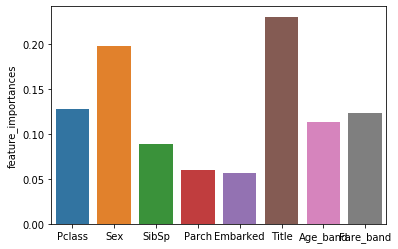

In [105]:
# 説明変数の重要度を確認する
#   - 分類に貢献した度合いを確認する
#   - 予測するのにどのパラメータが効いたか（有効だったか）
feature_importances = pd.DataFrame(
                {'feature_importances':model.feature_importances_}
)
sns.barplot(tr_train_X.columns, feature_importances['feature_importances'])
plt.show()

- 上記結果からは、Title(敬称)が最も予測に貢献した説明変数だったと言える
    - 前処理で作成したパラメータが効いている、ということでもある